<a href="https://colab.research.google.com/github/ilileun/Pytorch_Basic/blob/main/test5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 이동하기
%cd "/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog"

/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog


In [ ]:
# 현재 위치 알기
%pwd

'/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog'

In [ ]:
ls

Untitled0.ipynb


In [ ]:
# 깃 clone하기 
!git clone https://github.com/gilbutITbook/080289

Cloning into '080289'...
remote: Enumerating objects: 2278, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 2278 (delta 4), reused 29 (delta 3), pack-reused 2246
Receiving objects: 100% (2278/2278), 330.28 MiB | 15.46 MiB/s, done.
Resolving deltas: 100% (13/13), done.
Updating files: 100% (2591/2591), done.


In [ ]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 필요한 라이브러리 호출
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms #데이터 전처리를 위해 사용하는 라이브러리
from torch.utils.data import Dataset, DataLoader 


In [ ]:
# CPU 혹은 GPU 장치 확인
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
#  fashion_mnist 데이터샛 내려받기

test_dataset = torchvision.datasets.FashionMNIST("/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data", download=True, transform = transforms.Compose([transforms.ToTensor()]))

train_dataset = torchvision.datasets.FashionMNIST("/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data", download=True, train= True, transform = transforms.Compose([transforms.ToTensor()]))


In [ ]:
# 데이터를 데이터로더에 전달
# 100개 단위로 데이터를 묶어서 불러오다.
# 순서가 무작위로 섞이도록 shuffle 할 수 있다.
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size= 100)

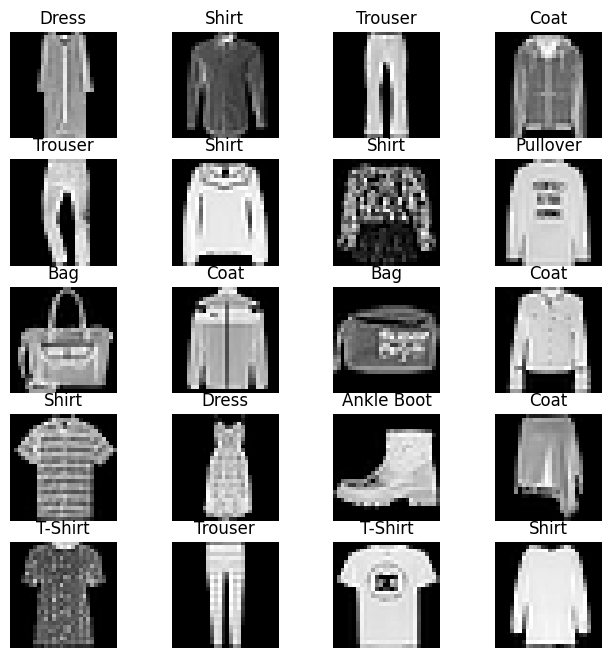

In [ ]:
# 분류에 사용될 클래스 정의

# 열개의 클래스 정의
labels_map = {0 : 'T-Shirt', 1: 'Trouser', 2 : 'Pullover', 3: 'Dress', 4 : 'Coat', 5 : 'Sandal', 6: 'Shirt', 7 : 'Sneaker' ,8 : 'Bag', 9: 'Ankle Boot'}

# 출력할이미지의 가로세로 길이로 단위는 inch
fig = plt.figure(figsize=(8,8)) 

columns = 4;
rows = 5;

for i in range(1,columns*rows+1):
  img_xy = np.random.randint(len(train_dataset));
  img = train_dataset[img_xy][0][0,:,:]
  fig.add_subplot(rows,columns,i)
  plt.title(labels_map[train_dataset[img_xy][1]])
  plt.axis('off')
  plt.imshow(img,cmap='gray')

plt.show()

In [ ]:
# 심층 신경망 모델 생성
class FashionDNN(nn.Module): # 상속시키기
  def __init__(self): # 속성 값 초기화
    super(FashionDNN,self).__init__() # 부모(super)클래스 상속
    self.fc1 = nn.Linear(in_features=784, out_features=256)
    self.drop=nn.Dropout(0.25)
    self.fc2 =nn.Linear(in_features=256, out_features=128)
    self.fc3 = nn.Linear(in_features=128,out_features=10)

  def forward(self, input_data):
    out = input_data.view(-1,784)
    out = F.relu(self.fc1(out)) # 활성화 함수 지정 
    out=self.drop(out)
    out =F.relu(self.fc2(out))
    out = self.fc3(out)
    return out
    

# 주요용어 : 상속, 함수, 클래스, 객체
# 활성화 함수 지정 방법 2가지
## F.relu() : forward 함수에서 정의 -> 가중치 수동으로 전달 
## nn.ReLU() : __init__() 함수에서 정의 -> 가중치 자동으로 전달 

In [ ]:
# test= torch.randn(2,3,4,1)
# test

tensor([[[[ 0.2052],
          [ 1.5558],
          [ 0.0087],
          [ 0.6180]],

         [[ 0.3554],
          [-0.4635],
          [-0.3371],
          [-2.0411]],

         [[ 0.0254],
          [ 1.6104],
          [ 0.6008],
          [-0.9762]]],


        [[[-0.6150],
          [-1.5757],
          [-0.9895],
          [ 0.0368]],

         [[-0.0592],
          [ 0.0982],
          [ 1.2746],
          [ 0.7499]],

         [[ 0.3119],
          [-2.3880],
          [ 1.1905],
          [ 0.0389]]]])

In [ ]:
#심픙 신경망에서 필요한 파라미터 정의
learning_rate = 0.001;
model = FashionDNN(); # 객체 호출 
model.to(device) # cpu, gpu 사용 호출

criterion = nn.CrossEntropyLoss(); # 손실함수
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # 최적화, 경사하강
print(model)

FashionDNN(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (drop): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
print(train.shape)
print(labels.shape) # [100] 은 1x100을 의미하는 1차원임!

torch.Size([100, 1, 28, 28])
torch.Size([100])


In [ ]:
# 심층 신경망을 이용한 모델 학습

num_epochs = 5
count = 0
loss_list =[]
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list =[]

for epoch in range(num_epochs):
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    train = Variable(images.view(100,1,28,28))
    labels = Variable(labels)

    outputs = model(train)
    loss = criterion(outputs, labels)
    optimizer.zero_grad() # 기본적으로 변화도는 더해지기(add up) 때문에 중복 계산을 막기 위해 반복할 때마다 명시적으로 0으로 설정합니다.
    loss.backward() # 역전파
    optimizer.step() # optimizer.step()을 호출하여 역전파 단계에서 수집된 변화도로 매개변수를 조정
    count +=1

    if not (count % 50): #  count를 50으로 나누었을 때 나머지가 0이 아니라면 실행
      total = 0
      correct = 0
      for images,labels in test_loader:
        images,labels = images.to(device), labels.to(device)
        labels_list.append(labels)
        test= Variable(images.view(100,1,28,28))
        outputs = model(test)
        predictions = torch.max(outputs, 1)[1].to(device)
        predictions_list.append(predictions)
        correct += (predictions == labels).sum()
        total +=len(labels)

      
      accuracy = correct *100 /total
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)


    if not (count % 500):
      print("iteration: {}. Loss : {}, Accuracy :{}".format(count,loss.data, accuracy))

iteration: 500. Loss : 0.5406928062438965, Accuracy :84.26000213623047
iteration: 1000. Loss : 0.47060349583625793, Accuracy :85.7300033569336
iteration: 1500. Loss : 0.3424988090991974, Accuracy :86.27166748046875
iteration: 2000. Loss : 0.3889353275299072, Accuracy :87.3116683959961
iteration: 2500. Loss : 0.2737693786621094, Accuracy :87.47333526611328
iteration: 3000. Loss : 0.32330238819122314, Accuracy :88.375


- 일반적으로 list 만드는 방법 두가지 -> list = [], list.append()
- 모델이 데이터를 처리하기 위해서는 모델과 데이터가 동일한 장치(CPU, GPU)에 있어야함. model.to(device)를 GPU로 사용했다면, image.to(device), labels.to(device)도 GPU에서 처리되어야 함.CPU에서 처리된 데이터를 GPU 모델에 적용하면 런타임 오류 발생함
- Autograd는 자동 미분 수행 패키지, Varuable을 사용해서 역전파를 위한 미분값을 자동으로 계산함
- view는 변경 전과 변경 후의 텐서 안의 원소의 개수가 유지되어야 함
- "Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문"에 우리는 항상 backpropagation을 하기전에 gradients를 zero로 만들어주고 시작. 이렇게 gradients을 더해주는 방식은 RNN을 학습시킬때 매우 편리한 방식

In [ ]:
# 합성곱 네트워크 생성 
class FashionCNN(nn.Module):    
    def __init__(self):
        super(FashionCNN, self).__init__()    
        self.layer1 = nn.Sequential( # 여러 계층을 하나의 컨테이너에 구현하는 것
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1), # 커널 크기를 의미하며 논문에 따라 필터라고함! CNN에서 학습 대상을 필터 파라미터임
            nn.BatchNorm2d(32), #평균은 0, 표준편차는 1로 데이터분포가 조정됨
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )       
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3), # 출력크기 : (W-F+2P)/S+1
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2) # 출력크기 : InputFilter size / Kernel_size 
        )        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10) # 마지막 계층은 out_features는 클래스 개수를 의미 
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1) # out.size(0) 은 64*6*6을 의미 -> 64*6*6*?
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)       
        return out

In [ ]:
# 합성곱 네트워크를 위한 파라미터 정의

learning_rate = 0.001;
model = FashionCNN();
model.to(device)

criterion = nn.CrossEntropyLoss();
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
print(model)

FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


In [ ]:
# 심층 신경망을 이용한 모델 학습

num_epochs = 5
count = 0
loss_list =[]
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list =[]

for epoch in range(num_epochs):
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)

    train = Variable(images.view(100,1,28,28))
    labels = Variable(labels)

    outputs = model(train)
    loss = criterion(outputs, labels)
    optimizer.zero_grad() # 기본적으로 변화도는 더해지기(add up) 때문에 중복 계산을 막기 위해 반복할 때마다 명시적으로 0으로 설정합니다.
    loss.backward() # 역전파
    optimizer.step() # optimizer.step()을 호출하여 역전파 단계에서 수집된 변화도로 매개변수를 조정
    count +=1

    if not (count % 50): #  count를 50으로 나누었을 때 나머지가 0이 아니라면 실행
      total = 0
      correct = 0
      for images,labels in test_loader:
        images,labels = images.to(device), labels.to(device)
        labels_list.append(labels)
        test= Variable(images.view(100,1,28,28))
        outputs = model(test)
        predictions = torch.max(outputs, 1)[1].to(device)
        predictions_list.append(predictions)
        correct += (predictions == labels).sum()
        total +=len(labels)

      
      accuracy = correct *100 /total
      loss_list.append(loss.data)
      iteration_list.append(count)
      accuracy_list.append(accuracy)


    if not (count % 500):
      print("iteration: {}. Loss : {}, Accuracy :{}".format(count,loss.data, accuracy))

NameError: ignored

### 전이학습

In [ ]:
# 라이브러리 호출

import os
import time
import copy
import glob
import cv2
import shutil

import torch
import torchvision # 컴퓨터비전 용도의 패키지
import torchvision.transforms as transforms # 데이터 전처리를 위해 사용되는 패키지
import torchvision.models as models # 다양한 파이토치 네트워크를 사용할 수 있도록 도와주는 패키지
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [ ]:
from google.colab import files # 데이터 불러오기
file_uploaded=files.upload()   # 데이터 불러오기: chap05/data/catndog.zip 파일 선택

In [ ]:
!unzip catanddog.zip -d catanddog/    #catanddog 폴더 만들어 압축 풀기

unzip:  cannot find or open catanddog.zip, catanddog.zip.zip or catanddog.zip.ZIP.


In [ ]:
catanddog_train_datapath = '/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog/train'

transform = transforms.Compose( # 이미지데이터를 변환하여 모델(네트워크)입력으로 사용할 수 있게 변환해줌
    [
        transforms.Resize([256,256]), #사이즈 조정
        transforms.RandomResizedCrop(224), #이미지를 랜덤한 크기 및 비율로 자름 -> 데이터 확장 용도
        transforms.RandomHorizontalFlip(), # 이미지를 랜덤하게 수평으로 뒤집음
        transforms.ToTensor() # 이미지 데이터를 텐서로 변환시켜줌 
    ]
)

train_dataset = torchvision.datasets.ImageFolder( #데이터로더가 불러올 대상(혹은 경로)와 방법(=혹은 전처리)을 정의
    catanddog_train_datapath, # 불러올 데이터가 위치한 경로
    transform = transform # 이미지 데이터에 대한 전처리 

)

train_loader = torch.utils.data.DataLoader( 
    train_dataset,
    batch_size= 32, # 한 번에 불러올 데이터양을 결정하는 배치 크기
    num_workers = 8, # 데이터를 불러올 때 하위 프로세스를 몇개 사용할지
    shuffle =True # 데이터를 무작위로 섞을지 
)

print(len(train_dataset)) # 데이터 개수 출력 

369


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


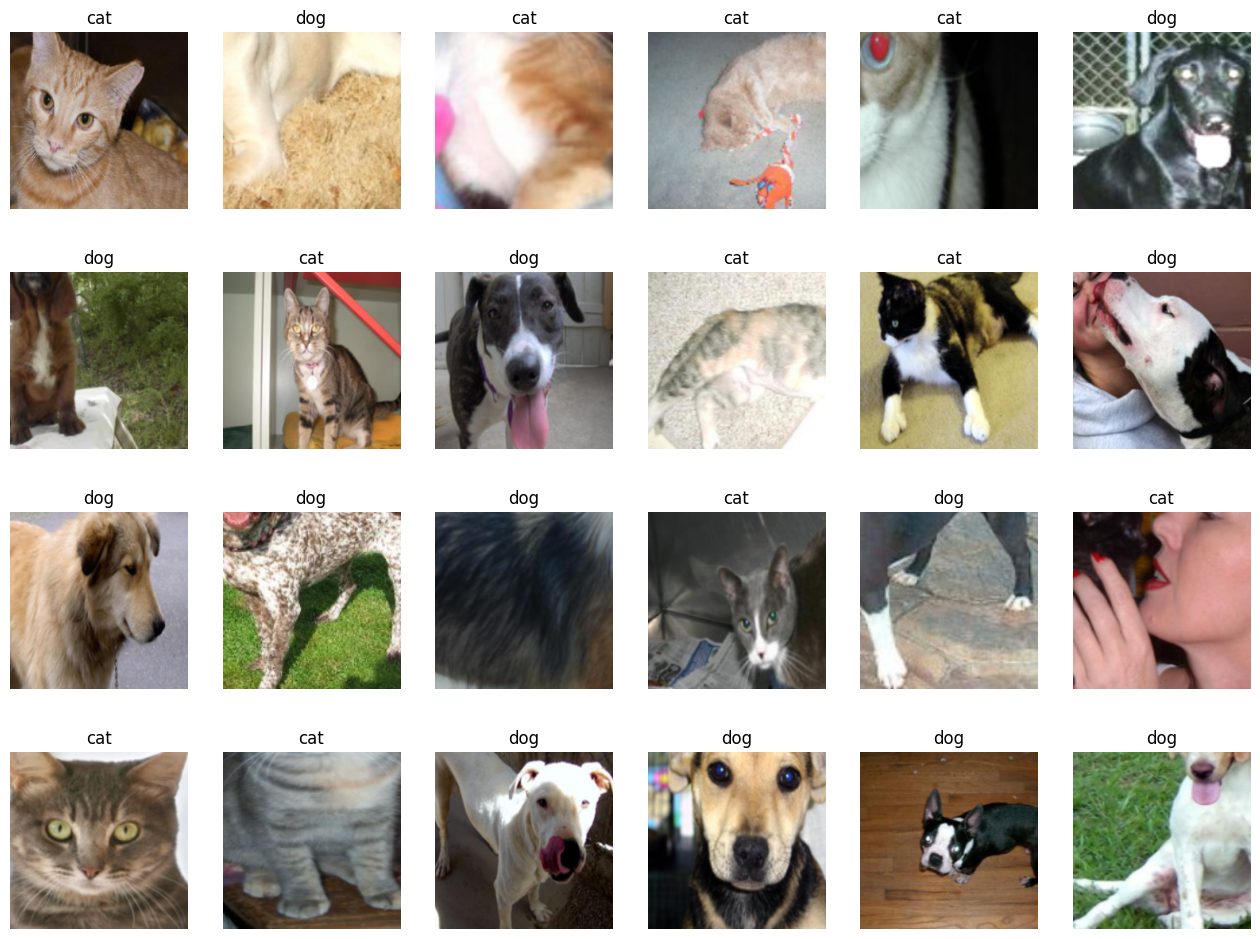

In [ ]:
# 학습에 사용될 이미지 출력

import numpy as np
samples, labels =  next(iter(train_loader)) # iter(train_loader).next() 이렇게 쓰면 오류 뜸! 

#반복자 iteratir를 사용하려면 iter()과 next()가 필요함. 
# iter()은 전달된 데이터의 반복자를 꺼내 반환, next() 그 다음 반복자가 다음에 출력해야할 요소를 반환

classes = {0 : 'cat', 1:'dog'} # 개와 고양이 클래스

fig = plt.figure(figsize= (16,24)) 
for i in range(24): # 24개의 이미지 출력
  a = fig.add_subplot(4,6,i+1)
  a.set_title(classes[labels[i].item()]) #레이블 정보(클래스)를 함께 출력
  a.axis('off')
  a.imshow(np.transpose(samples[i].numpy(),(1,2,0))) # 행과 열의 차원을 바꿈 
plt.subplots_adjust(bottom =0.2, top =0.6, hspace = 0)

In [ ]:
# 데이터가 준비되었다면 사전훈련된 모델 내려받기
resnet18 = models.resnet18(pretrained = True) # true는 사전 학습된 가중치를 사용하겠다는 의미

# 사전 훈련된 모델의 파라미터 학습 유무 지정 
def set_parameter_requires_grad(model, feature_extracting = True):
  if feature_extracting:
    for param in model.parameters():
      param.requires_grad = False # 모델 일부(conv layer, pooling 층)는 고정하고 나머지를 학습하고자 함 

    

set_parameter_requires_grad(resnet18)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 132MB/s]


In [ ]:
# resnet18에 완전 연결층 추가

resnet18.fc = nn.Linear(512,2)

# 모델의 파라미터 값 확인
for name, param in resnet18.named_parameters():
    if param.requires_grad:
        print(name, param.data)

fc.weight tensor([[-0.0372,  0.0065, -0.0372,  ...,  0.0392, -0.0403,  0.0148],
        [-0.0050,  0.0042,  0.0343,  ..., -0.0438,  0.0249, -0.0291]])
fc.bias tensor([-0.0056, -0.0394])


In [ ]:
model = models.resnet18(pretrained = True) # 모델 객체 생성 

for param in model.parameters(): # 모델의 합성곱층 가중치 고정 
    param.requires_grad = False

model.fc = torch.nn.Linear(512, 2)
for param in model.fc.parameters(): # 완전연결층은 학습 
    param.requires_grad = True

optimizer = torch.optim.Adam(model.fc.parameters())
cost = torch.nn.CrossEntropyLoss() # 손실함수 정의 
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# 모델 학습을 위한 함수 생성 

def train_model(model, dataloaders, criterion, optimizer, device, num_epochs=13, is_train=True):
    since = time.time()    # 현재 시각을 구하는 함수
    acc_history = []
    loss_history = []
    best_acc = 0.0
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            model.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0) # 출력 결과와 레이블의 오차를 께산한 결과를 누적하여 저장
            running_corrects += torch.sum(preds == labels.data) # 출력 결과와 레이블이 동일한지 확인한 결과를 누적하여 저장 

        epoch_loss = running_loss / len(dataloaders.dataset) # 평균 오차 계산
        epoch_acc = running_corrects.double() / len(dataloaders.dataset) # 평균 정확도 계산

        print('Loss: {:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

        if epoch_acc > best_acc:
            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        loss_history.append(epoch_loss)        
        torch.save(model.state_dict(), os.path.join('/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog/', '{0:0=2d}.pth'.format(epoch))) # 모델 재사용을 위해 저장해 둠
        print()

    time_elapsed = time.time() - since # 학습시간 계산 
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))    
    return acc_history, loss_history # 모델의 정확도와 오차를 반환 

In [ ]:
# 파라미터 학습 결과를 옵티마이저에 전달

params_to_update = []
for name,param in resnet18.named_parameters(): 
    if param.requires_grad == True:
        params_to_update.append(param) # 파라미터 학습 결과를 저장 
        print("\t",name)
            
optimizer = optim.Adam(params_to_update) # 학습 결과를 옵티마이저에 전달 

	 fc.weight
	 fc.bias


In [ ]:
# 모델 학습 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss() # 손실 함수 정
train_acc_hist, train_loss_hist = train_model(resnet18, train_loader, criterion, optimizer, device)

Epoch 0/12
----------
Loss: 0.3335 Acc: 0.8699

Epoch 1/12
----------
Loss: 0.2353 Acc: 0.9431

Epoch 2/12
----------
Loss: 0.2204 Acc: 0.9133

Epoch 3/12
----------
Loss: 0.2027 Acc: 0.9079

Epoch 4/12
----------
Loss: 0.2258 Acc: 0.9024

Epoch 5/12
----------
Loss: 0.2181 Acc: 0.8943

Epoch 6/12
----------
Loss: 0.1698 Acc: 0.9512

Epoch 7/12
----------
Loss: 0.1620 Acc: 0.9377

Epoch 8/12
----------
Loss: 0.1553 Acc: 0.9431

Epoch 9/12
----------
Loss: 0.1465 Acc: 0.9458

Epoch 10/12
----------
Loss: 0.1799 Acc: 0.9160

Epoch 11/12
----------
Loss: 0.1371 Acc: 0.9539

Epoch 12/12
----------
Loss: 0.1519 Acc: 0.9377

Training complete in 0m 49s
Best Acc: 0.953930


In [ ]:
# 데스트 데이터 호출 및 전처리
test_path = '/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog/test'

transform = transforms.Compose(
                [
                    transforms.Resize(224),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                ])
test_dataset = torchvision.datasets.ImageFolder(
    root=test_path,
    transform=transform
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=32,
    num_workers=1,
    shuffle=True
)

print(len(test_dataset))

84


In [ ]:
def eval_model(model, dataloaders, device):
    since = time.time()    
    acc_history = []
    best_acc = 0.0

    saved_models = glob.glob('/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog/' + '*.pth') # 경로 잘 설정 필요
    saved_models.sort() #불러온 .pth 파일들은 정렬 
    print('saved_model', saved_models)

    for model_path in saved_models:
        print('Loading model', model_path)

        model.load_state_dict(torch.load(model_path))
        model.eval()
        model.to(device)
        running_corrects = 0

        for inputs, labels in dataloaders: # 테스트 반복
            inputs = inputs.to(device)
            labels = labels.to(device)

            with torch.no_grad(): # autograd를 사용하지 않겠다는 의미
                outputs = model(inputs) # 데이터를 모델에 적용한 결과를 outputs에 저장

            _, preds = torch.max(outputs.data, 1) # 주어진 텐서 배열의 최대값이 들어 있는 index를 반환하는 함수          
            preds[preds >= 0.5] = 1 # torch.max로 출력된 값이 0.5보다 크다면 올바르게 예측
            preds[preds < 0.5] = 0 # 아니면 틀리게 예측 
            running_corrects += preds.eq(labels).int().sum() # preds와 labels가 일치하는지 검
            
        epoch_acc = running_corrects.double() / len(dataloaders.dataset) # 테스트 데이터 정확도 계산 
        print('Acc: {:.4f}'.format(epoch_acc))
        
        if epoch_acc > best_acc:
            best_acc = epoch_acc

        acc_history.append(epoch_acc.item())
        print()

    time_elapsed = time.time() - since
    print('Validation complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best Acc: {:4f}'.format(best_acc))
    
    return acc_history

In [ ]:
# 테스트 데이터를 평가 함수에 적용 
val_acc_hist = eval_model(resnet18, test_loader, device)

saved_model ['/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog/00.pth', '/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog/01.pth', '/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog/02.pth', '/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog/03.pth', '/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog/04.pth', '/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog/05.pth', '/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog/06.pth', '/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog/07.pth', '/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog/08.pth', '/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catanddog/09.pth', '/content/drive/MyDrive/ColabNotebooks/jieun_pytorch/080289/chap05/data/catan

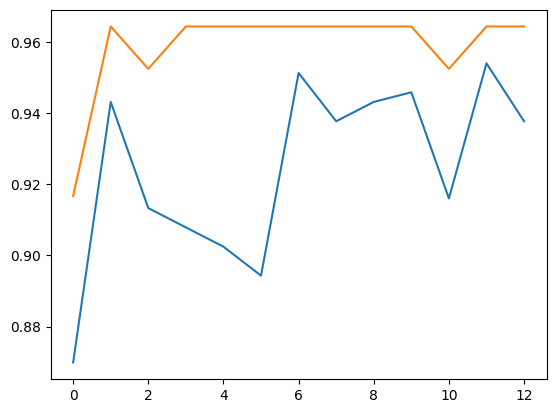

In [ ]:
plt.plot(train_acc_hist)
plt.plot(val_acc_hist)
plt.show()

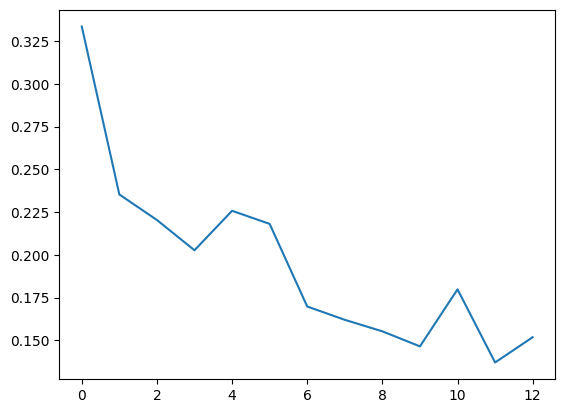

In [ ]:
plt.plot(train_loss_hist)
plt.show()

In [ ]:
# 예측 이미지 출력을 위한 전처리 함수 
def im_convert(tensor):  
    image=tensor.clone().detach().numpy()  
    image=image.transpose(1,2,0)  
    image=image*(np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5)))  
    image=image.clip(0,1)  # 0~1사이로 제한 
    return image  

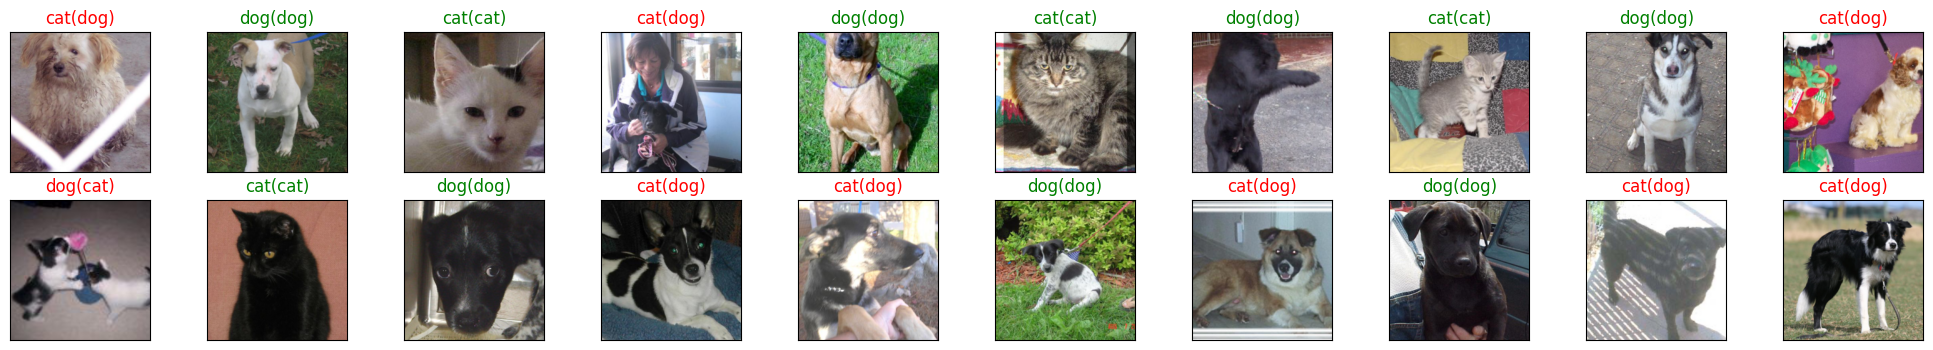

<Figure size 640x480 with 0 Axes>

In [ ]:
classes = {0:'cat', 1:'dog'}

dataiter=iter(test_loader)  # 테스트 데이터셋을 가져오고
images,labels = next(dataiter)  # 데스트 데이터셋에서 이미지와 레이블을 분리하여 가져옴 
output=model(images)  
_,preds=torch.max(output,1) 

fig=plt.figure(figsize=(25,4))  
for idx in np.arange(20):  
    ax=fig.add_subplot(2,10,idx+1,xticks=[],yticks=[])  # 한개의 이미지를 담기 위함 (행의 수, 열의수, 인덱스, 틱을 삭제하겠음 )
    plt.imshow(im_convert(images[idx]))  # 이미지출력을 위해 위코드에서 정의한 im_convert 함수 적용 
    a.set_title(classes[labels[i].item()]) 
    ax.set_title("{}({})".format(str(classes[preds[idx].item()]),str(classes[labels[idx].item()])),color=("green" if preds[idx]==labels[idx] else "red"))  
plt.show()  
plt.subplots_adjust(bottom=0.2, top=0.6, hspace=0)